<a href="https://colab.research.google.com/github/Yospy/Transfer-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

local_weight_files = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model = InceptionV3(input_shape=(150,150,3),
                               include_top=False,
                               weights=None)

pretrained_model.load_weights(local_weight_files)

for layer in pretrained_model.layers:
  layer.trainable = False

pretrained_model.summary()

--2022-01-23 05:27:13--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  29.8MB/s    in 2.8s    

2022-01-23 05:27:17 (29.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []   

In [3]:
last_layer = pretrained_model.get_layer('mixed7')
print("Last Layer Output Shape:", last_layer.output_shape)
last_output = last_layer.output

Last Layer Output Shape: (None, 7, 7, 768)


In [4]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1,activation='sigmoid')(x)

model = Model(pretrained_model.input,x)

model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

zip_ref = zipfile.ZipFile('./cats_and_dogs_filtered.zip','r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = "tmp/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir,"validation") 

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
valid_cats_dir = os.path.join(validation_dir,'cats')
valid_dogs_dir = os.path.join(validation_dir,'dogs')



train_cat_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 30,
                                                    class_mode='binary',
                                                    target_size = (150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 30,
                                                        class_mode = 'binary',
                                                        target_size = (150,150))

Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:01<00:00, 56.3MB/s]
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                              epochs=20,
                              validation_steps = 50,
                              verbose=2)

Epoch 1/20
67/67 - 143s - loss: 0.1975 - accuracy: 0.9170 - val_loss: 0.2061 - val_accuracy: 0.9400 - 143s/epoch - 2s/step
Epoch 2/20
67/67 - 105s - loss: 0.2202 - accuracy: 0.9170 - 105s/epoch - 2s/step
Epoch 3/20
67/67 - 104s - loss: 0.2072 - accuracy: 0.9225 - 104s/epoch - 2s/step
Epoch 4/20
67/67 - 104s - loss: 0.2091 - accuracy: 0.9195 - 104s/epoch - 2s/step
Epoch 5/20
67/67 - 104s - loss: 0.2040 - accuracy: 0.9215 - 104s/epoch - 2s/step
Epoch 6/20
67/67 - 103s - loss: 0.2072 - accuracy: 0.9305 - 103s/epoch - 2s/step
Epoch 7/20
67/67 - 106s - loss: 0.1911 - accuracy: 0.9240 - 106s/epoch - 2s/step
Epoch 8/20
67/67 - 105s - loss: 0.2025 - accuracy: 0.9240 - 105s/epoch - 2s/step
Epoch 9/20
67/67 - 105s - loss: 0.2074 - accuracy: 0.9185 - 105s/epoch - 2s/step
Epoch 10/20
67/67 - 106s - loss: 0.1790 - accuracy: 0.9300 - 106s/epoch - 2s/step
Epoch 11/20
67/67 - 104s - loss: 0.1682 - accuracy: 0.9305 - 104s/epoch - 2s/step
Epoch 12/20
67/67 - 107s - loss: 0.1696 - accuracy: 0.9340 - 107s

<Figure size 720x1080 with 0 Axes>

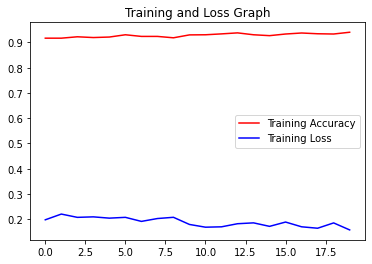

<Figure size 720x1080 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.title('Training and Loss Graph')
plt.legend(loc=0)
plt.figure(figsize=(10,15))